In [1]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# read_csv() 함수로 df 생성
# df = pd.read_csv('./auto-mpg.csv', header=None)
import pymysql

DB_HOST = 'localhost'
DB_USER = 'pyuser'
DB_PASSWD = 'pyuser'
DB_NAME = 'pyuser'

conn = pymysql.connect(host=DB_HOST, user=DB_USER, password=DB_PASSWD,
                   db=DB_NAME, charset='utf8')
curs = conn.cursor()
sql = """
    SELECT `posneg_grade`, ROUND(`posneg_rate`,0)
    FROM `2019_cgv` 
    Where posneg_grade in ('Good','Bad')

"""

curs.execute(sql)
table_data = curs.fetchall() 
conn.close()

table_data = [list(table_data[x]) for x in range(len(table_data))]       # tupple을 list형태로 변경

import pandas as pd
df = pd.DataFrame(table_data)    # list를 Dataframe 으로 변경
# print(type(df))

# 열 이름을 지정
df.columns = ['posneg_grade','posneg_rate']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   posneg_grade  33 non-null     object 
 1   posneg_rate   33 non-null     float64
dtypes: float64(1), object(1)
memory usage: 656.0+ bytes


In [3]:
df.head()

,posneg_grade,posneg_rate
0,Good,98.0
1,Bad,94.0
2,Bad,93.0
3,Good,63.0
4,Bad,66.0


In [4]:
import matplotlib.pyplot as plt
plt.style.use('default')   # 스타일 서식 지정

# Good, Bad 데이터 개수 카운트를 위해 값 1을 가진 열을 df에 추가
df['count'] = 1
df_group = df.groupby('posneg_grade').sum()   # origin 열을 기준으로 그룹화해서 합계 연산하는 df_origin 생성
print(df_group.head())                  # 그룹 연산 결과 출력


              posneg_rate  count
posneg_grade                    
Bad                1390.0     17
Good               1412.0     16


In [5]:
# df_group 은 그룹연산결과일뿐 실제 데이터가 변한것은 아님
# df.head()

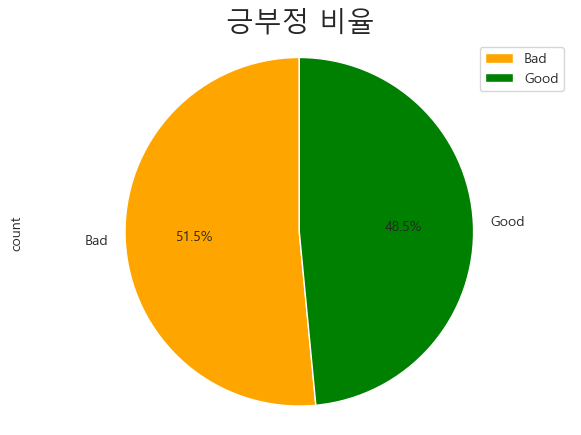

In [20]:
# 파이 차트 그리기 – count 열 데이터 사용

explode = [0.00, 0.00]      # 반지름의 OO% 만큼 벗어나도록 설정
# explode = [0.05, 0.05]      # 반지름의 OO% 만큼 벗어나도록 설정
wedgeprops={'width': 0.70, 'edgecolor': 'w', 'linewidth': 5}   # 부채꼴 스타일 지정. width 는 중간원의 크기

df_group['count'].plot(kind='pie', 
                     figsize=(7, 5),
#                      explode=explode,     # 중심에서 벗어나는 정도 설정
#                      shadow=True,         # 그림자 효과 주기
#                      wedgeprops=wedgeprops, # 부채꼴 스타일 지정. 그림자효과와 반지름 벗어나도록 설정하면 안됨
                     autopct='%1.1f%%',   # 퍼센트 % 표시
                     startangle=90,       # 파이 조각을 나누는 시작점(각도 표시), startangle=90 시작점을 90도(degree)로 지정
                     # 색상 리스트. 순서대로 적용됨
                     colors=['orange','green','red','yellow','purple','goldenrod','lightcoral', 'chocolate', 'bisque', 'cadetblue']   
                     )

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.title('긍부정 비율', size=20)
plt.axis('equal')    # 파이 차트의 비율을 같게 (원에 가깝게) 조정

plt.legend(labels=df_group.index, loc='upper right')   # 범례 표시
plt.show()

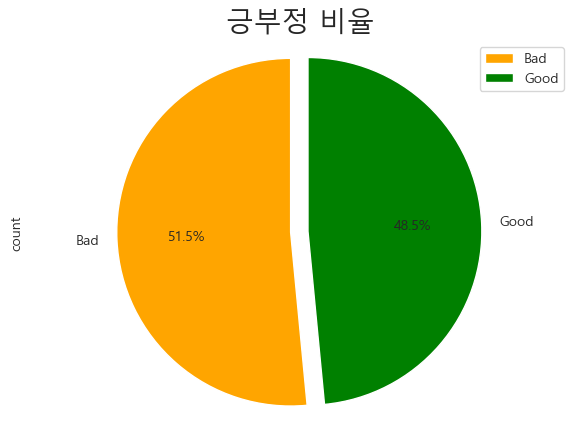

In [21]:
# 파이 차트 그리기 – count 열 데이터 사용

# explode = [0.0, 0.00]      # 반지름의 OO% 만큼 벗어나도록 설정
explode = [0.05, 0.05]      # 반지름의 OO% 만큼 벗어나도록 설정
wedgeprops={'width': 0.70, 'edgecolor': 'w', 'linewidth': 5}   # 부채꼴 스타일 지정. width 는 중간원의 크기

df_group['count'].plot(kind='pie', 
                     figsize=(7, 5),
                     explode=explode,     # 중심에서 벗어나는 정도 설정
#                      shadow=True,         # 그림자 효과 주기
#                      wedgeprops=wedgeprops, # 부채꼴 스타일 지정. 그림자효과와 반지름 벗어나도록 설정하면 안됨
                     autopct='%1.1f%%',   # 퍼센트 % 표시
                     startangle=90,       # 파이 조각을 나누는 시작점(각도 표시), startangle=90 시작점을 90도(degree)로 지정
                     # 색상 리스트. 순서대로 적용됨
                     colors=['orange','green','red','yellow','purple','goldenrod','lightcoral', 'chocolate', 'bisque', 'cadetblue']   
                     )

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.title('긍부정 비율', size=20)
plt.axis('equal')    # 파이 차트의 비율을 같게 (원에 가깝게) 조정

plt.legend(labels=df_group.index, loc='upper right')   # 범례 표시
plt.show()

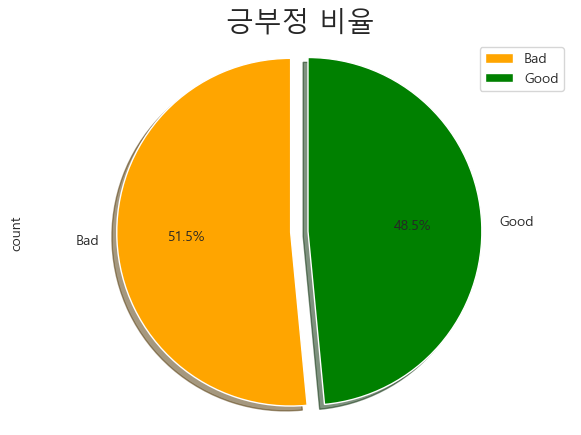

In [25]:
# 파이 차트 그리기 – count 열 데이터 사용

# explode = [0.0, 0.00]      # 반지름의 OO% 만큼 벗어나도록 설정
explode = [0.05, 0.05]      # 반지름의 OO% 만큼 벗어나도록 설정
wedgeprops={'width': 0.70, 'edgecolor': 'w', 'linewidth': 5}   # 부채꼴 스타일 지정. width 는 중간원의 크기

df_group['count'].plot(kind='pie', 
                     figsize=(7, 5),
                     explode=explode,     # 중심에서 벗어나는 정도 설정
                     shadow=True,         # 그림자 효과 주기
#                      wedgeprops=wedgeprops, # 부채꼴 스타일 지정. 그림자효과와 반지름 벗어나도록 설정하면 안됨
                     autopct='%1.1f%%',   # 퍼센트 % 표시
                     startangle=90,       # 파이 조각을 나누는 시작점(각도 표시), startangle=90 시작점을 90도(degree)로 지정
                     # 색상 리스트. 순서대로 적용됨
                     colors=['orange','green','red','yellow','purple','goldenrod','lightcoral', 'chocolate', 'bisque', 'cadetblue']   
                     )

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.title('긍부정 비율', size=20)
plt.axis('equal')    # 파이 차트의 비율을 같게 (원에 가깝게) 조정

plt.legend(labels=df_group.index, loc='upper right')   # 범례 표시
plt.show()

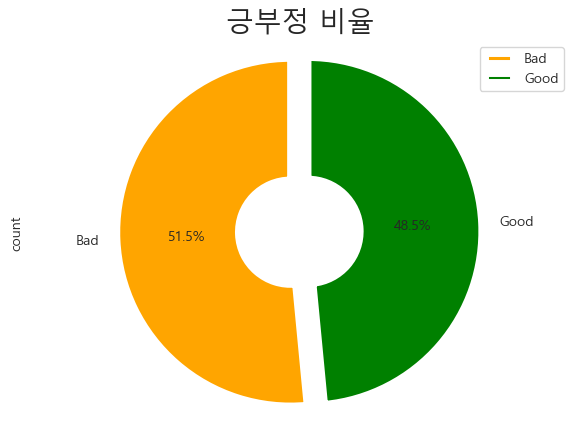

In [24]:
# 파이 차트 그리기 – count 열 데이터 사용

# explode = [0.0, 0.00]      # 반지름의 OO% 만큼 벗어나도록 설정
explode = [0.05, 0.05]      # 반지름의 OO% 만큼 벗어나도록 설정
wedgeprops={'width': 0.70, 'edgecolor': 'w', 'linewidth': 5}   # 부채꼴 스타일 지정. width 는 중간원의 크기

df_group['count'].plot(kind='pie', 
                     figsize=(7, 5),
                     explode=explode,     # 중심에서 벗어나는 정도 설정
#                      shadow=True,         # 그림자 효과 주기
                     wedgeprops=wedgeprops, # 부채꼴 스타일 지정. 그림자효과와 반지름 벗어나도록 설정하면 안됨
                     autopct='%1.1f%%',   # 퍼센트 % 표시
                     startangle=90,       # 파이 조각을 나누는 시작점(각도 표시), startangle=90 시작점을 90도(degree)로 지정
                     # 색상 리스트. 순서대로 적용됨
                     colors=['orange','green','red','yellow','purple','goldenrod','lightcoral', 'chocolate', 'bisque', 'cadetblue']   
                     )

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.title('긍부정 비율', size=20)
plt.axis('equal')    # 파이 차트의 비율을 같게 (원에 가깝게) 조정

plt.legend(labels=df_group.index, loc='upper right')   # 범례 표시
plt.show()

# 막대 그래프 그리기

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터셋 가져오기
print(df_group)
df_bar = df_group.reset_index()

print(df_bar)

df_bar.head()

              posneg_rate  count
posneg_grade                    
Bad                1390.0     17
Good               1412.0     16
  posneg_grade  posneg_rate  count
0          Bad       1390.0     17
1         Good       1412.0     16


,posneg_grade,posneg_rate,count
0,Bad,1390.0,17
1,Good,1412.0,16


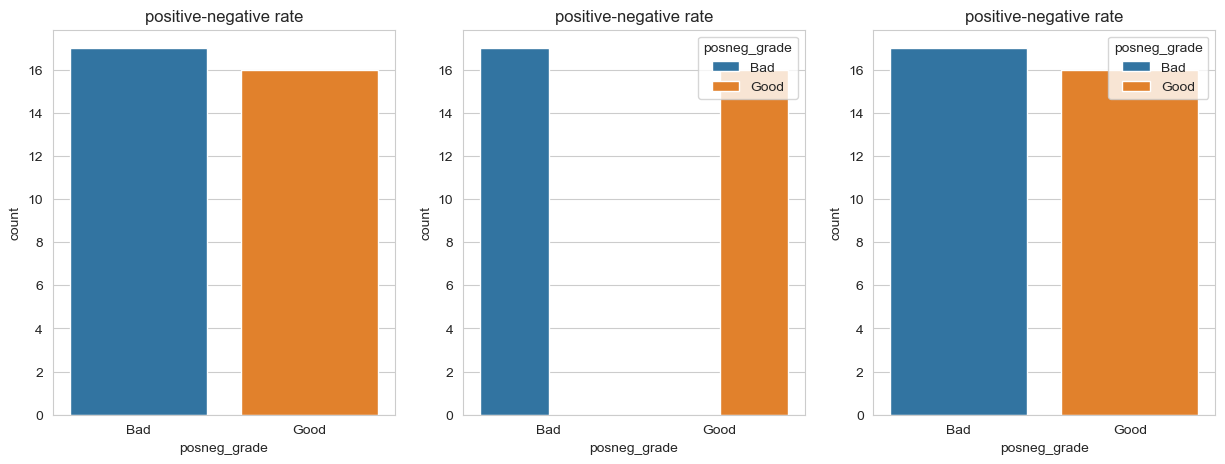

In [8]:
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))    # 사이즈는 인치
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)


# x축, y축에 변수 할당
sns.barplot(x='posneg_grade', y='count', data=df_bar, ax=ax1) 

# x축, y축에 변수 할당하고 hue 옵션 추가 
sns.barplot(x='posneg_grade', y='count', hue='posneg_grade', data=df_bar, ax=ax2) 

# x축, y축에 변수 할당하고 hue 옵션을 추가하여 누적 출력
sns.barplot(x='posneg_grade', y='count', hue='posneg_grade', dodge=False, data=df_bar, ax=ax3)       

# 차트 제목 표시
ax1.set_title('positive-negative rate')
ax2.set_title('positive-negative rate')
ax3.set_title('positive-negative rate')

plt.show()

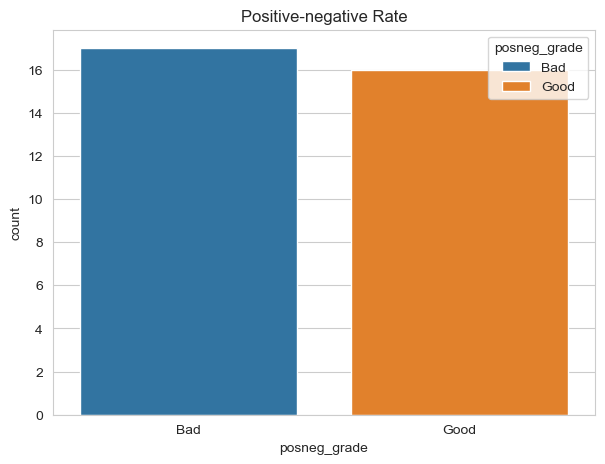

In [27]:
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(7, 5)) 
ax = fig.add_subplot(1, 1, 1)

# x축, y축에 변수 할당하고 hue 옵션을 추가하여 누적 출력
sns.barplot(x='posneg_grade', y='count', hue='posneg_grade', dodge=False, data=df_bar, ax=ax)

# 차트 제목 표시
ax.set_title('Positive-negative Rate')

plt.show()

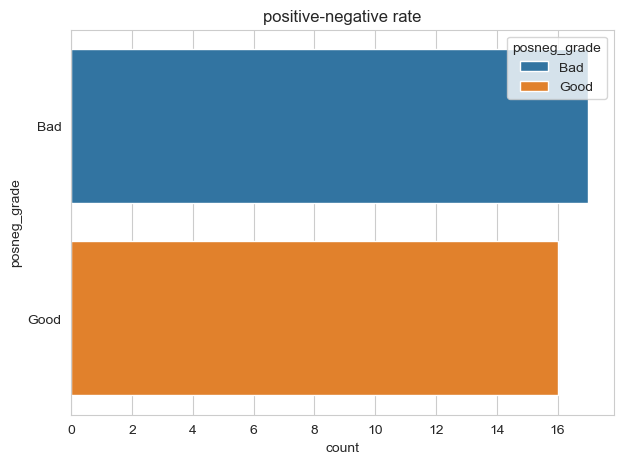

In [10]:
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(7, 5)) 
ax = fig.add_subplot(1, 1, 1)

# x축, y축에 변수 할당하고 hue 옵션을 추가하여 누적 출력
sns.barplot(x='count', y='posneg_grade', hue='posneg_grade', dodge=False, data=df_bar, ax=ax , orient='h')

# 차트 제목 표시
ax.set_title('positive-negative rate')

plt.show()

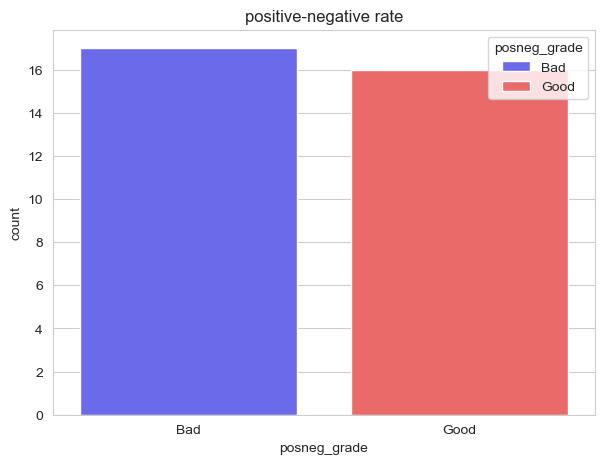

In [11]:
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(7, 5)) 
ax = fig.add_subplot(1, 1, 1)

# x축, y축에 변수 할당하고 hue 옵션을 추가하여 누적 출력
sns.barplot(x='posneg_grade', y='count', hue='posneg_grade', dodge=False, data=df_bar, ax=ax , palette='seismic')

# 차트 제목 표시
ax.set_title('positive-negative rate')

plt.show()

Text(0.5, 1.0, 'positive-negative rate')

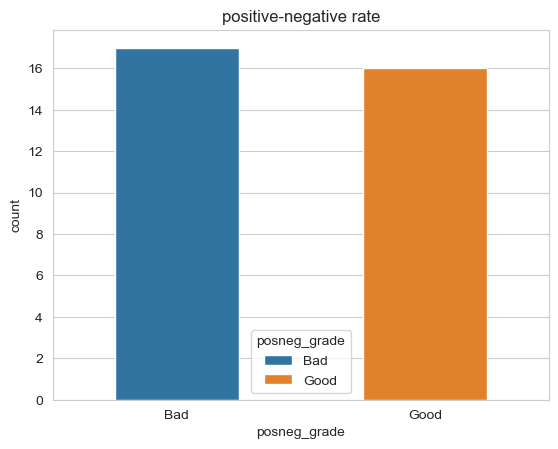

In [12]:
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

width = 0.5

ax = sns.barplot(x="posneg_grade", y="count", hue='posneg_grade', dodge=False, data=df_bar)

for bar in ax.patches:
    x = bar.get_x() # 막대 좌측 하단 x 좌표
    old_width = bar.get_width() # 기존 막대 폭
    bar.set_width(width) # 폭변경
    bar.set_x(x+(old_width-width)/2) # 막대 좌측 하단 x 좌표 업데이트


# 차트 제목 표시
ax.set_title('positive-negative rate')



# Box Plot 그리기

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터셋 가져오기
print(df_group)
df_box = df

print(df_box)

df_box.head()

              posneg_rate  count
posneg_grade                    
Bad                1390.0     17
Good               1412.0     16
   posneg_grade  posneg_rate  count
0          Good         98.0      1
1           Bad         94.0      1
2           Bad         93.0      1
3          Good         63.0      1
4           Bad         66.0      1
5          Good         97.0      1
6          Good         99.0      1
7           Bad         96.0      1
8           Bad         94.0      1
9          Good         60.0      1
10          Bad         79.0      1
11          Bad         78.0      1
12          Bad         75.0      1
13          Bad         92.0      1
14          Bad         94.0      1
15         Good         55.0      1
16         Good         93.0      1
17          Bad         97.0      1
18         Good         99.0      1
19         Good         98.0      1
20         Good         90.0      1
21          Bad         97.0      1
22          Bad         52.0      1
23  

,posneg_grade,posneg_rate,count
0,Good,98.0,1
1,Bad,94.0,1
2,Bad,93.0,1
3,Good,63.0,1
4,Bad,66.0,1


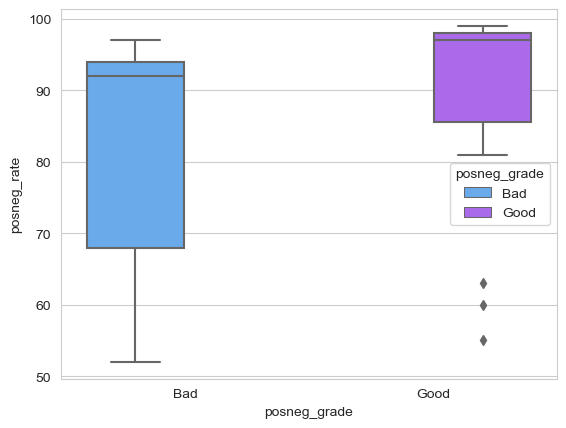

In [14]:
ax = sns.boxplot(data=df_box, x=df_box['posneg_grade'], y=df_box['posneg_rate'],
                 order=['Bad', 'Good'],
                 hue='posneg_grade',
                 hue_order=['Bad', 'Good'],
                 palette='cool'
                )